In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh.transformations as tt

In [3]:
import os
import sys
sys.path.append(
    os.path.normpath(
        os.path.join(os.getcwd(), '..')))

In [18]:
from src.objects import ChunkVolume, SceneVolume, CameraView
from src.datasets.matterport3d.data import Matterport3dDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [19]:
paths = Matterport3dDataPaths(
    data_root='/Users/artonson/tmp/s4g/matterport/',
    scene_id='D7N2EKCX4Sj',
    room_id='9',
    chunk_id='*',
    type_id='cmp'
)

In [20]:
paths.get_scene_filename('D7N2EKCX4Sj')

('/Users/artonson/tmp/s4g/matterport/mp_sdf_2cm_target/D7N2EKCX4Sj_room9__0__.sdf',
 '/Users/artonson/tmp/s4g/matterport/mp_sdf_2cm_target/D7N2EKCX4Sj_room9__0__.colors')

In [21]:
scene_volume = SceneVolume.from_paths(paths, 'D7N2EKCX4Sj')
paths._data.scene_volume = scene_volume
scene_volume.volume.world_to_grid

array([[  50.     ,    0.     ,    0.     ,  364.48892],
       [   0.     ,   50.     ,    0.     , -100.30975],
       [   0.     ,    0.     ,   50.     ,  172.61986],
       [   0.     ,    0.     ,    0.     ,    1.     ]], dtype=float32)

In [22]:
chunk_volume = ChunkVolume.from_paths(paths, '1')
chunk_volume.volume.world_to_grid

/Users/artonson/tmp/s4g/matterport/data-geo-color-128/D7N2EKCX4Sj_room9__cmp__1.sdf


array([[  50.     ,    0.     ,    0.     ,  332.48892],
       [   0.     ,   50.     ,    0.     , -100.30975],
       [   0.     ,    0.     ,   50.     ,  172.61986],
       [   0.     ,    0.     ,    0.     ,    1.     ]], dtype=float32)

In [23]:
camera_view = CameraView.from_paths(paths, '2028')
point_view = unproject_rgbd(camera_view)

In [24]:
scene_volume.plot_type = 'points'
scene_volume.plot_sdf_thr = 2.0
chunk_volume.plot_type = 'points'
chunk_volume.plot_colors = True
chunk_volume.plot_sdf_thr = 2.0


_ = display_3d(
    scene_volume,
    chunk_volume,
    PointsPlottable(
        points=point_view.depth,
        point_size=0.01,
        point_colors=rgb_to_packed_colors(
            point_view.rgb[:, 0],
            point_view.rgb[:, 1],
            point_view.rgb[:, 2],
        ),
    ),
    height=1024
)

(882425,)
(157820, 3)
(2097152,)
(67328, 3)
(128, 128, 128)


/Users/artonson/miniconda3/envs/py38_dev/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
/Users/artonson/miniconda3/envs/py38_dev/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "uint32". A coerced copy has been created.
  warnings.warn(


Output()

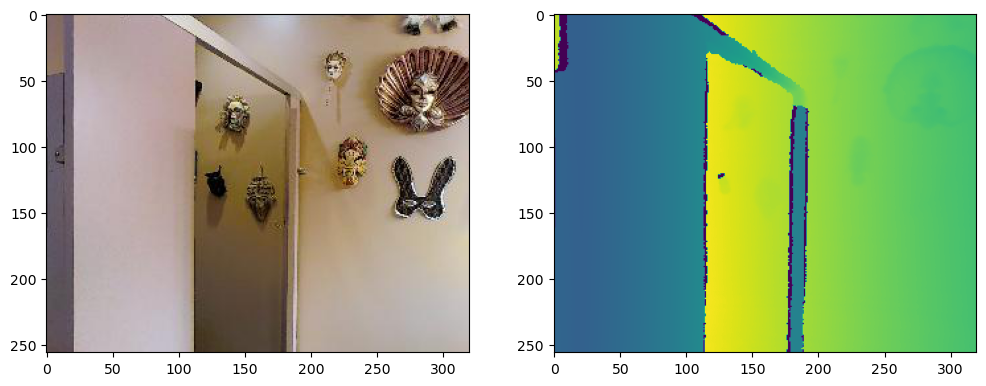

In [25]:
f, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs[0].imshow(camera_view.rgb)
axs[1].imshow(camera_view.depth)

In [27]:
from src.objects import ChunkVolume, SceneVolume, CameraView
from src.datasets.scannet.data import ScannetDataPaths
from src.utils.plotting import (
    display_3d, PointsPlottable, CameraPlottable, VolumePlottable,
    CameraFrustumPlottable)
from src.geometry.projection import unproject_rgbd
from src.utils.colors import rgb_to_packed_colors

In [28]:
paths = ScannetDataPaths(
    data_root='/Users/artonson/tmp/s4g/scannet/',
    scene_id='scene0480',
    room_id='00',
    chunk_id='*',
    type_id='cmp'
)

In [29]:
camera_view = CameraView.from_paths(paths, '20', resize_rgb_to_depth=True)
point_view = unproject_rgbd(camera_view)

/Users/artonson/repos/frustum_chunk_intersection/src/objects.py:76: UserWarning: Resizing RGB from (968, 1296, 3) to (480, 640)
  warnings.warn(f'Resizing RGB from {str(rgb_array.shape)} '


In [30]:
scene_volume = SceneVolume.from_paths(paths, 'scene0480')
paths._data.scene_volume = scene_volume
scene_volume.volume.world_to_grid

array([[  20.73465  ,   45.49805  ,    0.       , -123.77125  ],
       [ -45.49805  ,   20.73465  ,    0.       ,  170.1638   ],
       [   0.       ,    0.       ,   50.       ,    6.1818547],
       [   0.       ,    0.       ,    0.       ,    1.       ]],
      dtype=float32)

In [37]:
chunk_volume = ChunkVolume.from_paths(paths, '1')
chunk_volume.volume.world_to_grid

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__1.sdf


array([[  20.73465  ,   45.49805  ,    0.       , -155.77124  ],
       [ -45.49805  ,   20.73465  ,    0.       ,  170.1638   ],
       [   0.       ,    0.       ,   50.       ,    6.1818547],
       [   0.       ,    0.       ,    0.       ,    1.       ]],
      dtype=float32)

In [38]:
scene_volume.plot_type = 'points'
scene_volume.plot_sdf_thr = 0.02
chunk_volume.plot_type = 'points'
chunk_volume.plot_colors = True
chunk_volume.plot_sdf_thr = 0.02


_ = display_3d(
    scene_volume,
    chunk_volume,
    PointsPlottable(
        points=point_view.depth,
        point_size=0.01,
        point_colors=rgb_to_packed_colors(
            point_view.rgb[:, 0],
            point_view.rgb[:, 1],
            point_view.rgb[:, 2],
        ),
    ),
    height=1024
)

(361246,)
(130697, 3)
(106380,)
(7938, 3)


/Users/artonson/miniconda3/envs/py38_dev/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

In [39]:
from src.datasets.view_chunk_matching import compute_fraction_of_view_in_chunk

In [45]:
compute_fraction_of_view_in_chunk(
    chunk_volume,
    camera_view,
    max_distance_thr=0.01)

0.3025910885663299

In [57]:
paths = ScannetDataPaths(
    data_root='/Users/artonson/tmp/s4g/scannet/',
    scene_id='scene0480',
    room_id='00',
    chunk_id='*',
    type_id='cmp',
    verbose=True,
)
paths.load()

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__*.sdf
Loading camera-chunk correspondences
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/*.txt


  2%|███▏                                                                                                                                                   | 1/47 [00:00<00:04,  9.99it/s]

Loading camera views
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/100.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/100.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/100.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/840.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/840.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/840.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/920.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/920.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/920.png


 11%|████████████████                                                                                                                                       | 5/47 [00:00<00:03, 12.17it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/300.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/300.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/300.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/880.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/880.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/880.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/260.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/260.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/260.png


 15%|██████████████████████▍                                                                                                                                | 7/47 [00:00<00:03, 12.35it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/700.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/700.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/700.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/660.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/660.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/660.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/460.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/460.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/460.png


 23%|███████████████████████████████████                                                                                                                   | 11/47 [00:00<00:02, 12.49it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/500.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/500.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/500.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/360.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/360.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/360.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/200.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/200.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/200.png


 28%|█████████████████████████████████████████▍                                                                                                            | 13/47 [00:01<00:02, 12.57it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/160.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/160.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/160.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/820.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/820.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/820.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/60.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/60.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/60.png


 36%|██████████████████████████████████████████████████████▎                                                                                               | 17/47 [00:01<00:02, 12.49it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/400.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/400.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/400.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/560.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/560.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/560.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/760.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/760.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/760.png


 40%|████████████████████████████████████████████████████████████▋                                                                                         | 19/47 [00:01<00:02, 12.56it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/600.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/600.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/600.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/220.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/220.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/220.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/80.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/80.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/80.png


 49%|█████████████████████████████████████████████████████████████████████████▍                                                                            | 23/47 [00:01<00:01, 12.54it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/340.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/340.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/340.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/180.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/180.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/180.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/40.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/40.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/40.png


 53%|███████████████████████████████████████████████████████████████████████████████▊                                                                      | 25/47 [00:02<00:01, 12.59it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/800.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/800.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/800.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/380.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/380.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/380.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/140.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/140.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/140.png


 62%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                         | 29/47 [00:02<00:01, 12.60it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/540.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/540.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/540.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/420.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/420.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/420.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/780.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/780.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/780.png


 66%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 31/47 [00:02<00:01, 12.63it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/580.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/580.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/580.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/0.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/0.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/0.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/620.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/620.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/620.png


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 35/47 [00:02<00:00, 12.58it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/740.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/740.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/740.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/280.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/280.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/280.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/900.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/900.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/900.png


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 37/47 [00:02<00:00, 12.59it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/20.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/20.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/20.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/860.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/860.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/860.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/120.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/120.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/120.png


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 41/47 [00:03<00:00, 12.62it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/240.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/240.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/240.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/320.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/320.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/320.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/480.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/480.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/480.png


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 43/47 [00:03<00:00, 12.58it/s]

/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/640.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/640.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/640.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/720.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/720.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/720.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/520.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/520.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/520.png


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:03<00:00, 12.53it/s]


/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/440.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/440.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/440.png
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/pose/680.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/intrinsic/intrinsic_depth.txt
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/color/680.jpg
/Users/artonson/tmp/s4g/scannet/scannet_re/scene0480_00/depth/680.png
Loading full volumes
Loading chunks


  0%|                                                                                                                                                               | 0/41 [00:00<?, ?it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__29.sdf


  5%|███████▎                                                                                                                                               | 2/41 [00:00<00:02, 15.78it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__15.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__4.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__5.sdf


 10%|██████████████▋                                                                                                                                        | 4/41 [00:00<00:02, 17.92it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__14.sdf


 15%|██████████████████████                                                                                                                                 | 6/41 [00:00<00:02, 16.29it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__28.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__16.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__7.sdf


 20%|█████████████████████████████▍                                                                                                                         | 8/41 [00:00<00:02, 16.25it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__6.sdf


 24%|████████████████████████████████████▌                                                                                                                 | 10/41 [00:00<00:01, 16.15it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__17.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__13.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__2.sdf


 29%|███████████████████████████████████████████▉                                                                                                          | 12/41 [00:00<00:01, 15.63it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__3.sdf


 34%|███████████████████████████████████████████████████▏                                                                                                  | 14/41 [00:00<00:01, 15.52it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__12.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__10.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__38.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__1.sdf


 49%|█████████████████████████████████████████████████████████████████████████▏                                                                            | 20/41 [00:01<00:01, 18.32it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__0.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__39.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__11.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__40.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__34.sdf


 56%|████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 23/41 [00:01<00:00, 18.81it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__20.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__21.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__35.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__23.sdf


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 29/41 [00:01<00:00, 21.76it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__37.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__36.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__22.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__26.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__32.sdf


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 32/41 [00:01<00:00, 20.64it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__33.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__27.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__31.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__25.sdf


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 35/41 [00:01<00:00, 20.60it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__19.sdf


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 38/41 [00:02<00:00, 18.44it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__8.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__9.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__18.sdf
/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__24.sdf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41/41 [00:02<00:00, 18.52it/s]

/Users/artonson/tmp/s4g/scannet/scannet_chunk_128/scene0480_00__cmp__30.sdf


In [59]:
visibility = paths.compute_fraction_of_view_in_chunk(
    max_distance_thr=0.01
)

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                | 37/47 [00:05<00:01,  6.46it/s]


KeyboardInterrupt: 